In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
DATADIR = '/Users/utkarsh/Downloads/Dataset-2/training'
CLASS = ['neg','pos']
IMG_SIZE = 50

neg = []
pos = []

# building the training data
def create_training_data():  
  for cl in CLASS:
    path = os.path.join(DATADIR, cl)
    class_num = CLASS.index(cl)
    if class_num == 0:
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path, img))
          img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
          neg.append([gray_img, class_num])
        except Exception as e:
          pass
    if class_num == 1:
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path, img))
          img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
          pos.append([gray_img, class_num])
        except Exception as e:
          pass
  random.shuffle(neg)
  random.shuffle(pos)
  training_data = neg[:len(pos)]+pos
  return training_data

training_data = create_training_data()

In [3]:
random.shuffle(training_data)
print(len(training_data))

318


In [4]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [5]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [6]:
# normalizing the data
X = X/255.0

In [7]:
# building the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:], data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)       

In [9]:
history = model.fit(X, y, batch_size=32, validation_split=0.1, epochs=100)

Train on 286 samples, validate on 32 samples
Epoch 1/100
286/286 [==============================] - 2s 7ms/step - loss: 1.5148 - accuracy: 0.5734 - val_loss: 0.6703 - val_accuracy: 0.6875
Epoch 2/100
286/286 [==============================] - 1s 3ms/step - loss: 1.1114 - accuracy: 0.5699 - val_loss: 0.6276 - val_accuracy: 0.6875
Epoch 3/100
286/286 [==============================] - 1s 4ms/step - loss: 0.9738 - accuracy: 0.6154 - val_loss: 0.6210 - val_accuracy: 0.6875
Epoch 4/100
286/286 [==============================] - 1s 4ms/step - loss: 0.8178 - accuracy: 0.6364 - val_loss: 0.6286 - val_accuracy: 0.6875
Epoch 5/100
286/286 [==============================] - 1s 4ms/step - loss: 0.8224 - accuracy: 0.6503 - val_loss: 0.6369 - val_accuracy: 0.6875
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 0.7719 - accuracy: 0.6643 - val_loss: 0.6571 - val_accuracy: 0.6875
Epoch 7/100
286/286 [==============================] - 1s 3ms/step - loss: 0.7136 - accuracy: 0.6

286/286 [==============================] - 1s 4ms/step - loss: 0.3724 - accuracy: 0.8217 - val_loss: 2.0609 - val_accuracy: 0.5000
Epoch 58/100
286/286 [==============================] - 1s 4ms/step - loss: 0.4306 - accuracy: 0.7867 - val_loss: 2.9004 - val_accuracy: 0.3125
Epoch 59/100
286/286 [==============================] - 1s 4ms/step - loss: 0.4165 - accuracy: 0.8147 - val_loss: 2.4143 - val_accuracy: 0.4375
Epoch 60/100
286/286 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8112 - val_loss: 2.9761 - val_accuracy: 0.4375
Epoch 61/100
286/286 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.7762 - val_loss: 2.4572 - val_accuracy: 0.5000
Epoch 62/100
286/286 [==============================] - 1s 4ms/step - loss: 0.3764 - accuracy: 0.8077 - val_loss: 2.6897 - val_accuracy: 0.5000
Epoch 63/100
286/286 [==============================] - 1s 4ms/step - loss: 0.3985 - accuracy: 0.8042 - val_loss: 2.8262 - val_accuracy: 0.5000
Epoch

In [10]:
def plot_result(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(1, len(acc)+1)

  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  
  plt.show()

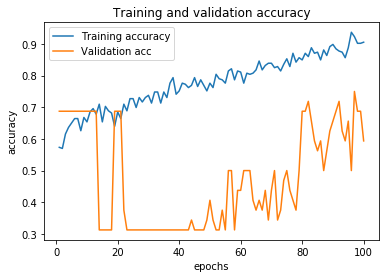

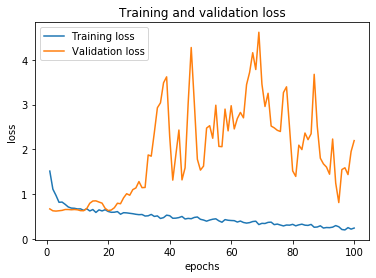

In [11]:
plot_result(history)

In [12]:
#model.save('new_helmet_model.h5')

In [29]:
from keras.preprocessing.image import load_img, img_to_array

img_pred = load_img('/Users/utkarsh/Downloads/WhatsApp Unknown 2020-09-19 at 8.22.30 PM/maithilee_with_helmet.jpeg',target_size=(50,50,50))
img_pred = img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
print(img_pred)

[[[[182. 208. 225.]
   [183. 202. 217.]
   [182. 201. 216.]
   ...
   [188. 175. 169.]
   [187. 177. 175.]
   [185. 174. 170.]]

  [[178. 204. 219.]
   [178. 200. 214.]
   [181. 203. 217.]
   ...
   [185. 178. 172.]
   [183. 172. 166.]
   [188. 174. 163.]]

  [[179. 206. 223.]
   [181. 207. 222.]
   [176. 202. 217.]
   ...
   [189. 177. 163.]
   [190. 176. 165.]
   [193. 179. 168.]]

  ...

  [[ 62.  53.  54.]
   [ 60.  56.  57.]
   [ 67.  61.  61.]
   ...
   [123.  89.  44.]
   [137. 100.  55.]
   [145. 107.  58.]]

  [[ 63.  53.  54.]
   [ 57.  48.  49.]
   [210. 201. 202.]
   ...
   [133. 100.  59.]
   [115.  80.  48.]
   [129.  96.  61.]]

  [[ 64.  54.  53.]
   [ 58.  46.  46.]
   [ 62.  52.  51.]
   ...
   [122.  89.  56.]
   [133.  99.  64.]
   [135. 100.  68.]]]]


In [28]:
result = model.predict(img_pred)
print(result)

train_generator.class_indices

ValueError: Error when checking input: expected conv2d_1_input to have shape (50, 50, 1) but got array with shape (50, 50, 3)